## Laboratorio 3 - Daily Total Female Births
Stefano Aragoni, Carol Arevalo

--------


1. Análisis Exploratorio:
Describir la serie de tiempo y visualizarla

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries

# Cargar los datos
dataframe = pd.read_csv("data/daily-total-female-births.csv", delimiter=",")

# Se imprime el dataframe
dataframe.head(10)

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27


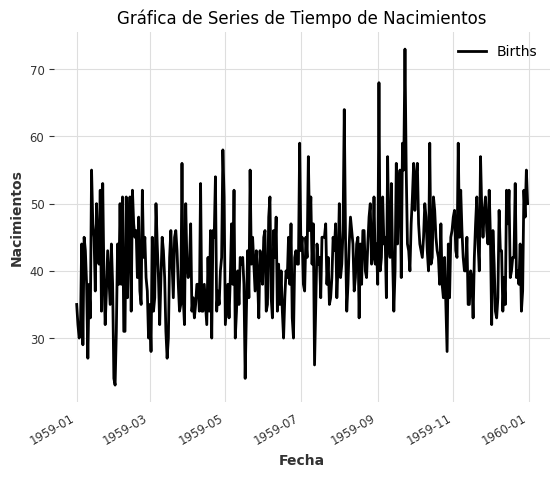

In [78]:
# Cargar la serie de tiempo
ts = TimeSeries.from_dataframe(dataframe, 'Date', 'Births')

# Crear la gráfica de serie de tiempo
fig, ax = plt.subplots()
ts.plot(ax=ax)

ax.set_title("Gráfica de Series de Tiempo de Nacimientos")
ax.set_xlabel("Fecha")
ax.set_ylabel("Nacimientos")
plt.show()

In [79]:
# Entrenamiento y validación
train, val = ts[:-40], ts[-40:]

-------
### Promedios
- Aplicar métodos de promedios y comparar los resultados con el conjunto original

Método 1: Naive Moving Average

RMSE = 6.63
MAE = 5.62


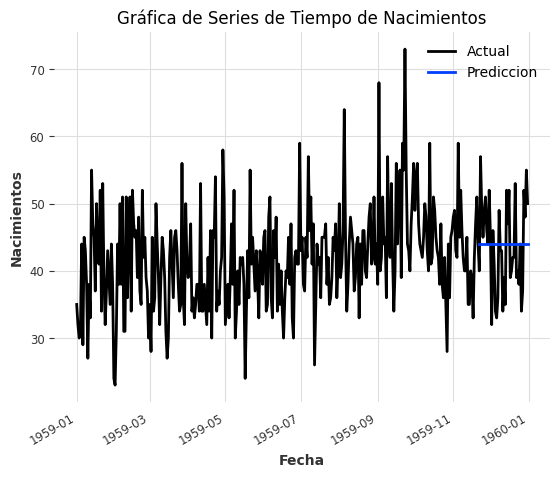

In [80]:
from darts.models import NaiveMovingAverage
from darts.metrics import rmse, mae

# Crear el modelo
model = NaiveMovingAverage()

# Entrenar el modelo
model.fit(train)

# Predecir los valores
prediction = model.predict(len(val))      # 36 es el 10% de los datos

# Error RMSE, MAE
print('RMSE = {:.2f}'.format(rmse(val, prediction)))
print('MAE = {:.2f}'.format(mae(val, prediction)))


# Crear la gráfica de serie de tiempo
fig, ax = plt.subplots()
ts.plot(label='Actual', ax=ax)
prediction.plot(label='Prediccion', ax=ax)

ax.set_title("Gráfica de Series de Tiempo de Nacimientos")
ax.set_xlabel("Fecha")
ax.set_ylabel("Nacimientos")
ax.legend()
plt.show()


Método 2: Naive Mean

RMSE = 6.89
MAE = 5.77


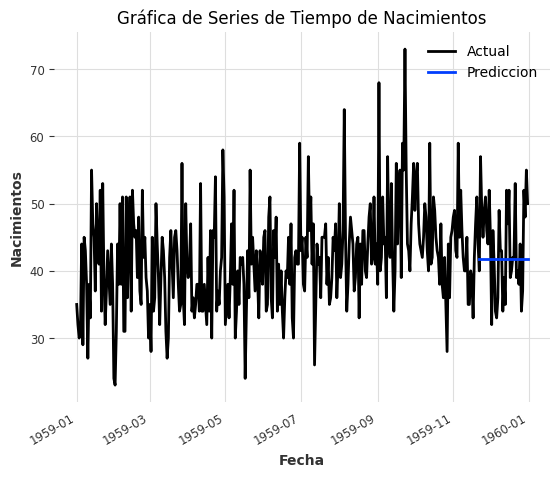

In [81]:
from darts.models import NaiveMean

# Crear el modelo
model = NaiveMean()

# Entrenar el modelo
model.fit(train)

# Predecir los valores
prediction = model.predict(len(val))      # 36 es el 10% de los datos

# Error RMSE, MAE
print('RMSE = {:.2f}'.format(rmse(val, prediction)))
print('MAE = {:.2f}'.format(mae(val, prediction)))


# Crear la gráfica de serie de tiempo
fig, ax = plt.subplots()
ts.plot(label='Actual', ax=ax)
prediction.plot(label='Prediccion', ax=ax)

ax.set_title("Gráfica de Series de Tiempo de Nacimientos")
ax.set_xlabel("Fecha")
ax.set_ylabel("Nacimientos")
ax.legend()
plt.show()

------
### SARIMA
- Identificar parámetros y ajustar un modelo SARIMA

-------
### Alisamiento Exponencial:
- Aplicar diferentes métodos de alisamiento exponencial y comparar.

Método 1: Single Exponential Smoothing

- No implementa tendencia ni estacionalidad. 

RMSE = 6.64
MAE = 5.62


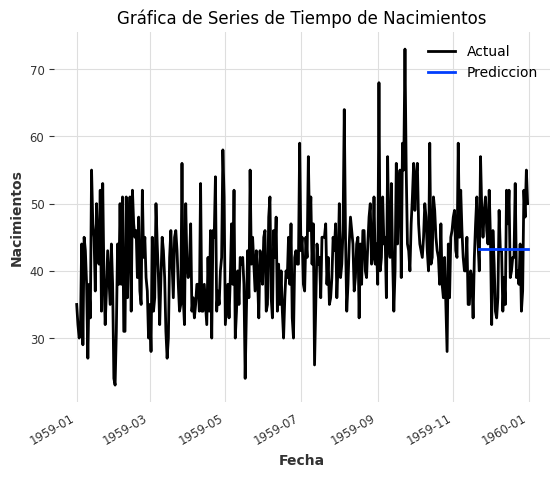

In [104]:
from darts.models import ExponentialSmoothing

# Crear el modelo SIMPLE EXPONENTIAL SMOOTHING
model = ExponentialSmoothing(
    trend=None,               # No hay tendencia
    seasonal=None,            # No hay estacionalidad
)

# Entrenar el modelo
model.fit(train)

# Predecir los valores
prediction = model.predict(len(val))      # 36 es el 10% de los datos

# Error RMSE, MAE
print('RMSE = {:.2f}'.format(rmse(val, prediction)))
print('MAE = {:.2f}'.format(mae(val, prediction)))


# Crear la gráfica de serie de tiempo
fig, ax = plt.subplots()
ts.plot(label='Actual', ax=ax)
prediction.plot(label='Prediccion', ax=ax, low_quantile=0.05, high_quantile=0.95)

ax.set_title("Gráfica de Series de Tiempo de Nacimientos")
ax.set_xlabel("Fecha")
ax.set_ylabel("Nacimientos")
ax.legend()
plt.show()


Método 2: Double Exponential Smoothing

- Sí implementa tendencia pero no estacionalidad. 

RMSE = 6.65
MAE = 5.67


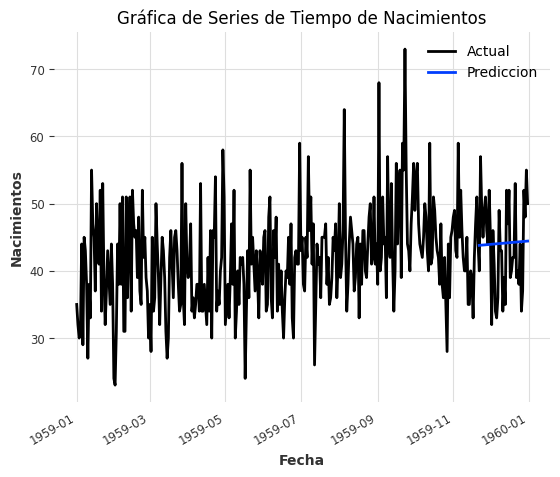

In [105]:
from darts.utils.utils import ModelMode, SeasonalityMode

# Crear el modelo DOUBLE EXPONENTIAL SMOOTHING
model = ExponentialSmoothing(
    trend= ModelMode.ADDITIVE,              # Sí hay tendencia
    seasonal=None,                          # No hay estacionalidad
)

# Entrenar el modelo
model.fit(train)

# Predecir los valores
prediction = model.predict(len(val))      # 36 es el 10% de los datos

# Error RMSE, MAE
print('RMSE = {:.2f}'.format(rmse(val, prediction)))
print('MAE = {:.2f}'.format(mae(val, prediction)))


# Crear la gráfica de serie de tiempo
fig, ax = plt.subplots()
ts.plot(label='Actual', ax=ax)
prediction.plot(label='Prediccion', ax=ax, low_quantile=0.05, high_quantile=0.95)

ax.set_title("Gráfica de Series de Tiempo de Nacimientos")
ax.set_xlabel("Fecha")
ax.set_ylabel("Nacimientos")
ax.legend()
plt.show()


Método 3: Triple Exponential Smoothing (Holt-Winters' exponential smoothing)

- Sí implementa tendencia y estacionalidad. 

RMSE = 6.65
MAE = 5.47


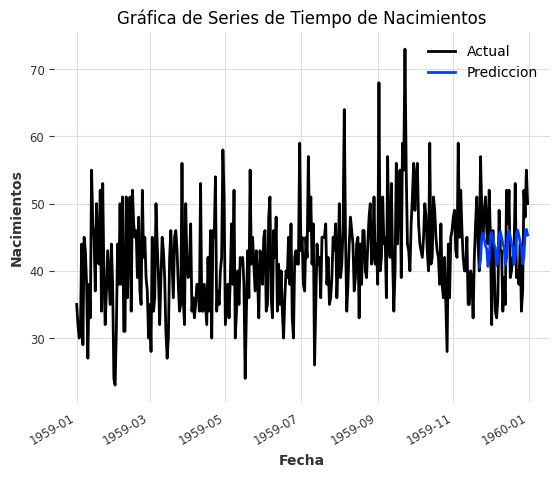

In [106]:
# Crear el modelo TRIPLE EXPONENTIAL SMOOTHING
model = ExponentialSmoothing(
    trend= ModelMode.ADDITIVE,                  # Sí hay tendencia
    seasonal=SeasonalityMode.MULTIPLICATIVE     # Sí hay estacionalidad
    #seasonal_periods                           # Inferido automáticamente
)

# Entrenar el modelo
model.fit(train)

# Predecir los valores
prediction = model.predict(len(val))      # 36 es el 10% de los datos

# Error RMSE, MAE
print('RMSE = {:.2f}'.format(rmse(val, prediction)))
print('MAE = {:.2f}'.format(mae(val, prediction)))


# Crear la gráfica de serie de tiempo
fig, ax = plt.subplots()
ts.plot(label='Actual', ax=ax)
prediction.plot(label='Prediccion', ax=ax)

ax.set_title("Gráfica de Series de Tiempo de Nacimientos")
ax.set_xlabel("Fecha")
ax.set_ylabel("Nacimientos")
ax.legend()
plt.show()


---------
### Prophet
- Utilizar Prophet para modelar la serie de tiempo.

18:49:55 - cmdstanpy - INFO - Chain [1] start processing
18:49:55 - cmdstanpy - INFO - Chain [1] done processing


RMSE = 7.02
MAE = 5.83


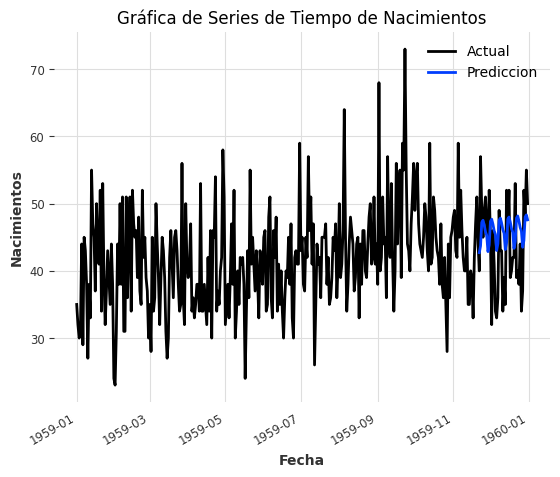

In [110]:
from darts.models.forecasting.prophet_model import Prophet

# Crear el modelo
model = Prophet()

# Entrenar el modelo
model.fit(train)

# Predecir los valores
prediction = model.predict(len(val))      # 36 es el 10% de los datos

# Error RMSE, MAE
print('RMSE = {:.2f}'.format(rmse(val, prediction)))
print('MAE = {:.2f}'.format(mae(val, prediction)))


# Crear la gráfica de serie de tiempo
fig, ax = plt.subplots()
ts.plot(label='Actual', ax=ax)
prediction.plot(label='Prediccion', ax=ax)

ax.set_title("Gráfica de Series de Tiempo de Nacimientos")
ax.set_xlabel("Fecha")
ax.set_ylabel("Nacimientos")
ax.legend()
plt.show()

Redes Neuronales:
• Implementar una red neuronal simple para prever la serie de tiempo

In [103]:
from darts.models import RNNModel
from darts.utils.timeseries_generation import gaussian_timeseries

# Crear una serie de tiempo sintética (en caso de que no se tenga una serie real)
synthetic_ts = gaussian_timeseries(length=len(ts), freq='D', start_ts=ts.time_index[0])

rnn_model = RNNModel(input_chunk_length=32, output_chunk_length=10, n_epochs=100)
rnn_model.fit(synthetic_ts)
rnn_forecast = rnn_model.predict(forecast_horizon)

synthetic_ts.plot(label='Sintético')
rnn_forecast.plot(label='RNN Forecast')
plt.legend()
plt.show()


TypeError: gaussian_timeseries() got an unexpected keyword argument 'start_ts'

Comparación y Evaluación:
• Usar métricas como RMSE, MAE para comparar los modelos.
• Discutir cuál algoritmo se desempeña mejor para cada tipo de conjunto de datos y
por qué

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calcular métricas de evaluación para cada modelo
rmse_sarima = mean_squared_error(ts, sarima_forecast, squared=False)
mae_sarima = mean_absolute_error(ts, sarima_forecast)

rmse_rnn = mean_squared_error(synthetic_ts, rnn_forecast, squared=False)
mae_rnn = mean_absolute_error(synthetic_ts, rnn_forecast)

# Imprimir resultados
print(f'SARIMA RMSE: {rmse_sarima}, SARIMA MAE: {mae_sarima}')
print(f'RNN RMSE: {rmse_rnn}, RNN MAE: {mae_rnn}')
